In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import random
import matplotlib.image as mpimg
from imutils import paths
import sys
import operator

In [ ]:
!pip install rich
!pip install hydra-core
!pip install pytorch-lightning

In [ ]:
sys.path.insert(0, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation")
sys.path.insert(1, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation/src/utils")

In [ ]:
import pytorch_lightning as pl
from src.utils.display_image_from_path import img_show
from src.utils.display_image_from_array import img_show_from_arr

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/image.png")
img_mask = cv2.imread("/content/drive/MyDrive/output/test_page_predicted_masks/osmanlica_test_mask_100x100.png")

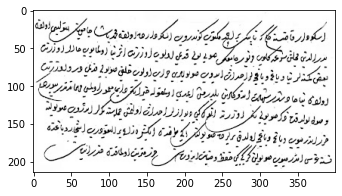

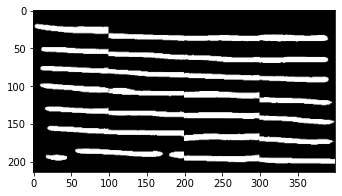

In [ ]:
img_show_from_arr(img)
img_show_from_arr(img_mask)

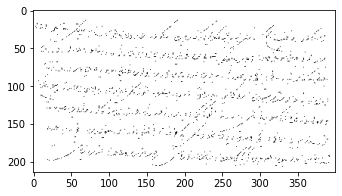

In [ ]:
img_show_from_arr(img * np.ones(img.shape))

In [ ]:
img2 = np.ones(img.shape)

for i in range(img2.shape[0]):
  for j in range(img2.shape[1]):
    img2[i][j][0] = 255
    img2[i][j][1] = 255
    img2[i][j][2] = 255

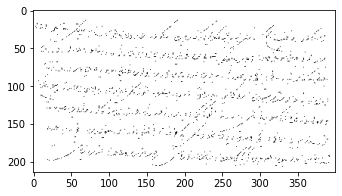

In [ ]:
img_show_from_arr(img * img2)

In [ ]:
def next_neighbor_as_zero(height, width, mask):

  pixels_having_0_as_neighbor = []

  for i in range(1, height-1):
    for j in range(1, width-1):
      if mask[i][j][0] == 255:
        if mask[i-1][j][0] == 0: # downstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j-1][0] == 0: # left neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i+1][j][0] == 0: # upstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j+1][0] == 0: # right neighbor
          pixels_having_0_as_neighbor.append((i, j))
  return pixels_having_0_as_neighbor

In [ ]:
def frequency_of_ones(window):
  unique, counts = np.unique(window, return_counts=True)
  x = np.asarray((unique, counts)).T

  if len(x) == 1:
    if x[0][0] == 0:
      return 0
    else:
      return x[0][1]
  else:
    return x[1][1]

In [ ]:
def n_neighbor_as_zero(height, width, mask, distance):

  pixels_having_0_as_neighbor = []

  for i in range(distance, height-distance):
    for j in range(distance, width-distance):
      if mask[i][j][0] == 255:
        if mask[i-distance][j][0] == 0: # downstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j-distance][0] == 0: # left neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i+distance][j][0] == 0: # upstairs neighbor
          pixels_having_0_as_neighbor.append((i, j))
        elif mask[i][j+distance][0] == 0: # right neighbor
          pixels_having_0_as_neighbor.append((i, j))
  return pixels_having_0_as_neighbor

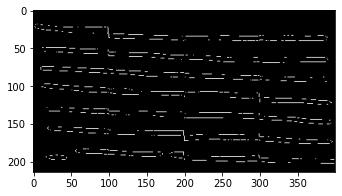

In [ ]:
height, width, depth = img.shape
next_neighbor0_coords = next_neighbor_as_zero(height, width, img_mask)
next_neighbor0_mask = np.zeros(img.shape)

for coord in next_neighbor0_coords:
  next_neighbor0_mask[coord[0]][coord[1]][0] = 255
  next_neighbor0_mask[coord[0]][coord[1]][1] = 255
  next_neighbor0_mask[coord[0]][coord[1]][2] = 255

img_show_from_arr(next_neighbor0_mask)

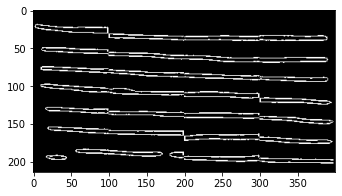

In [ ]:
line_mask_v1_coords = n_neighbor_as_zero(height, width, img_mask, 2)
line_mask_v1_mask = np.zeros(img.shape)

for coord in line_mask_v1_coords:
  line_mask_v1_mask[coord[0]][coord[1]][0] = 255
  line_mask_v1_mask[coord[0]][coord[1]][1] = 255
  line_mask_v1_mask[coord[0]][coord[1]][2] = 255

img_show_from_arr(line_mask_v1_mask)

In [ ]:
line_mask_v1_coords[0:10]

[(18, 5),
 (19, 3),
 (19, 4),
 (19, 5),
 (19, 6),
 (19, 7),
 (19, 8),
 (19, 9),
 (19, 10),
 (19, 11)]

In [ ]:
line_mask_v1_rows = []

for coord in line_mask_v1_coords:
  line_mask_v1_rows.append(coord[0])

line_mask_v1_rows

In [ ]:
line_mask_v1_rows = np.array(line_mask_v1_rows)
line_mask_v1_unique_rows = np.unique(line_mask_v1_rows)
line_mask_v1_unique_rows

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202])

In [35]:
bbox_ycoords = []
bbox_ycoords.append(line_mask_v1_unique_rows[0])
for i in range(0,len(line_mask_v1_unique_rows)-1):
  if abs(line_mask_v1_unique_rows[i] - line_mask_v1_unique_rows[i+1]) > 2:
    y2 = line_mask_v1_unique_rows[i]
    y1 = line_mask_v1_unique_rows[i+1]
    bbox_ycoords.append(y2)
    bbox_ycoords.append(y1)
bbox_ycoords.append(line_mask_v1_unique_rows[-1])

In [36]:
bbox_ycoords

[18, 40, 49, 69, 74, 94, 97, 124, 128, 150, 154, 176, 183, 202]

In [37]:
def create_row_patches(y1, y2, coords):
  row_patch_coords = []
  for coord in coords:
    if coord[0] >= y1 and coord[0] <= y2:
      row_patch_coords.append(coord)
  return row_patch_coords

def find_min_col(y1, y2, coords):
  min = 1000000
  row_patch_coords = create_row_patches(y1, y2, coords)
  for coord in row_patch_coords:
    if coord[1] < min:
      min = coord[1]
  return min

def find_max_col(y1, y2, coords):
  max = 0
  row_patch_coords = create_row_patches(y1, y2, coords)
  for coord in row_patch_coords:
    if coord[1] > max:
      max = coord[1]
  return max

In [39]:
row_patches = [(bbox_ycoords[i], bbox_ycoords[i+1]) for i in range(0, len(bbox_ycoords), 2)]
row_patches

[(18, 40), (49, 69), (74, 94), (97, 124), (128, 150), (154, 176), (183, 202)]

In [42]:
lines_bbox = []

for y1, y2 in row_patches:
  x1 = find_min_col(y1, y2, line_mask_v1_coords)
  x2 = find_max_col(y1, y2, line_mask_v1_coords)
  lines_bbox.append((x1, y1, x2, y2))

lines_bbox

[(2, 18, 389, 40),
 (11, 49, 390, 69),
 (10, 74, 390, 94),
 (10, 97, 395, 124),
 (16, 128, 397, 150),
 (19, 154, 396, 176),
 (17, 183, 397, 202)]

In [59]:
def create_line_image_from_bbox(bbox, img, safety_gap_x, safety_gap_y):
  x1, y1, x2, y2 = bbox
  row = img[y1-safety_gap_y:y2+safety_gap_y, x1-safety_gap_x:x2+safety_gap_x, :]
  return row

def create_row_images(bbox_list, img, safety_gap_x, safety_gap_y):
  rows = []
  for i in range(len(bbox_list)):
    row = create_line_image_from_bbox(bbox_list[i], img, safety_gap_x, safety_gap_y)
    rows.append(row)
  return rows

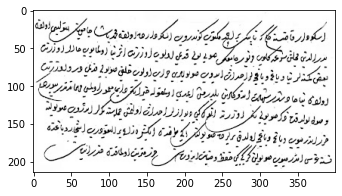

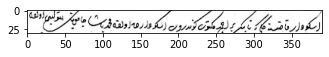

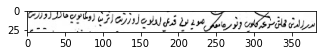

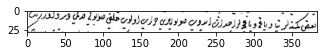

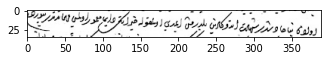

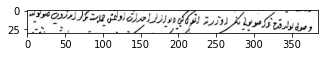

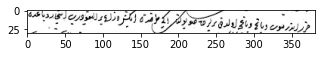

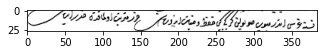

In [60]:
rows = create_row_images(lines_bbox, img, 2, 4)
img_show_from_arr(img)
for row in rows:
  img_show_from_arr(row)

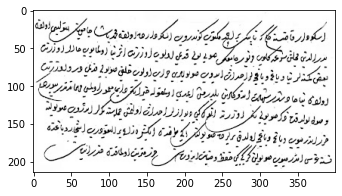

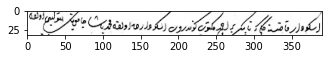

In [55]:
row1 = create_line_image_from_bbox(lines_bbox[0], img)
img_show_from_arr(img)
img_show_from_arr(row1)

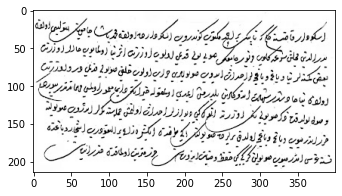

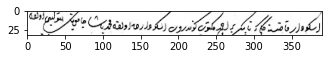

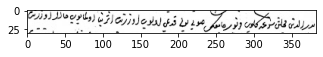

In [56]:
row2 = create_line_image_from_bbox(lines_bbox[1], img)
img_show_from_arr(img)
img_show_from_arr(row1)
img_show_from_arr(row2)